In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

## The normal euqation

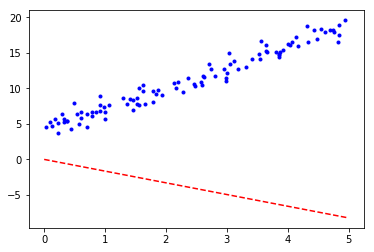

In [45]:
X = 5 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1) + 4

plt.plot(X, y, "b.")
plt.show()

In [46]:
X_b = np.c_[X, np.ones((100, 1))]
# theta_best = np.linalg.inv()
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[ 2.90804535]
 [ 4.21509616]]


In [47]:
X_new = np.array([[0], [2], [5]])
X_new_b = np.c_[X_new, np.ones((3, 1))]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[  4.21509616],
       [ 10.03118687],
       [ 18.75532293]])

In [48]:
class StringFormulaNotValid(Exception):
    pass

def plot_graph(formula, x_range, *option):
    x = np.array(x_range)
    if type(formula)==str:
        try:
            y = eval(formula) 
        except:
            raise StringFormulaNotValid("The formula {} is not a valid expression".format(formula))
    else:
        y = formula(x)
    if option:
        plt.plot(x,y,*option)
    else:
        plt.plot(x,y)

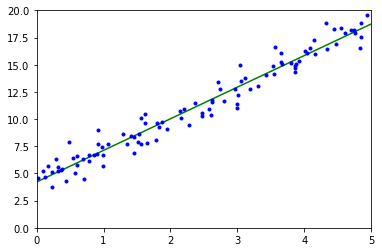

In [49]:
plot_graph("theta_best.T[0][0]*x+theta_best.T[0][1]", [0,5], "g-")
plt.plot(X, y, "b.")
plt.plot()
plt.axis([0, 5, 0, 20])
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(X, y)
theta_lin_reg = np.array([lin_reg.coef_, lin_reg.intercept_])
theta_lin_reg

array([[2.908045354575394],
       [4.215096157546749]], dtype=object)

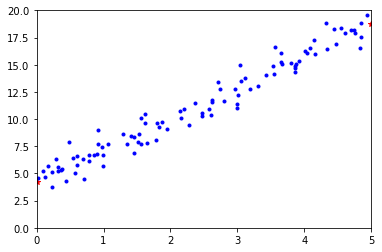

In [51]:
plot_graph(lambda x: theta_lin_reg.T[0][0]*x+theta_lin_reg.T[0][1], [0,5], "r*")
plt.plot(X, y, "b.")
plt.plot()
plt.axis([0, 5, 0, 20])
plt.show()

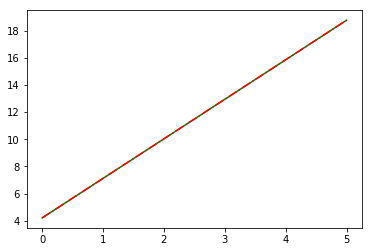

In [52]:
plot_graph("theta_best.T[0][0]*x+theta_best.T[0][1]", [0,5], "g-")
plot_graph(lambda x: theta_lin_reg.T[0][0]*x+theta_lin_reg.T[0][1], [0,5], "r-.")
plt.show()

In [53]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta= theta - eta * gradients

theta

array([[ 2.90804535],
       [ 4.21509616]])

In [54]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

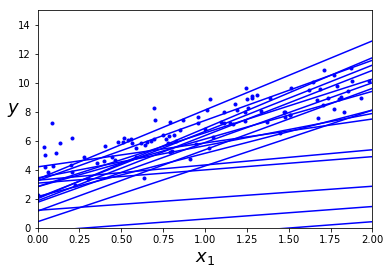

In [69]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show() 

In [60]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.82625905]), array([ 3.26064801]))

In [37]:
m = 100
X = 6 * np.random.randn(m, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X

array([[  0.57220232],
       [  4.08852719],
       [  1.54589506],
       [ -0.38883668],
       [  5.28055985],
       [  1.31682455],
       [  6.73672559],
       [  3.30854802],
       [ -5.04073736],
       [ -8.92826495],
       [ -2.51091782],
       [ -1.94876412],
       [  0.33020562],
       [ -8.35348715],
       [  1.04545344],
       [ -1.67530333],
       [  2.35921282],
       [  3.99422015],
       [  1.70406301],
       [ -0.44743236],
       [  8.92440124],
       [  3.62864217],
       [-15.17180442],
       [  2.85381803],
       [ 10.89537771],
       [  2.88558169],
       [ -3.84800217],
       [  6.63629159],
       [  3.8750416 ],
       [  0.45048315],
       [ -1.07497638],
       [  4.31490946],
       [ -1.07473446],
       [ -6.31607467],
       [ -5.32696211],
       [  1.47105464],
       [ -1.81875252],
       [  4.64981208],
       [  3.78463927],
       [  5.43797919],
       [  8.52389311],
       [ -5.30895338],
       [ -4.18573021],
       [-10

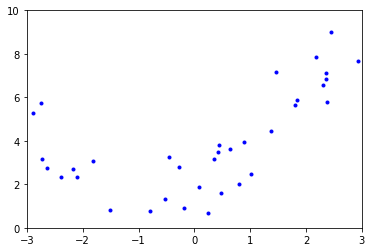

In [36]:
plt.plot(X, y, "b.")
plt.plot()
plt.axis([-3, 3, 0, 10])
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[  5.72202322e-01,   3.27415497e-01],
       [  4.08852719e+00,   1.67160546e+01],
       [  1.54589506e+00,   2.38979152e+00],
       [ -3.88836675e-01,   1.51193960e-01],
       [  5.28055985e+00,   2.78843123e+01],
       [  1.31682455e+00,   1.73402690e+00],
       [  6.73672559e+00,   4.53834717e+01],
       [  3.30854802e+00,   1.09464900e+01],
       [ -5.04073736e+00,   2.54090332e+01],
       [ -8.92826495e+00,   7.97139151e+01],
       [ -2.51091782e+00,   6.30470831e+00],
       [ -1.94876412e+00,   3.79768160e+00],
       [  3.30205623e-01,   1.09035753e-01],
       [ -8.35348715e+00,   6.97807475e+01],
       [  1.04545344e+00,   1.09297290e+00],
       [ -1.67530333e+00,   2.80664126e+00],
       [  2.35921282e+00,   5.56588515e+00],
       [  3.99422015e+00,   1.59537946e+01],
       [  1.70406301e+00,   2.90383074e+00],
       [ -4.47432355e-01,   2.00195713e-01],
       [  8.92440124e+00,   7.96449374e+01],
       [  3.62864217e+00,   1.31670440e+01],
       [ -

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)
X_poly

array([[  1.00000000e+00,   5.72202322e-01,   3.27415497e-01],
       [  1.00000000e+00,   4.08852719e+00,   1.67160546e+01],
       [  1.00000000e+00,   1.54589506e+00,   2.38979152e+00],
       [  1.00000000e+00,  -3.88836675e-01,   1.51193960e-01],
       [  1.00000000e+00,   5.28055985e+00,   2.78843123e+01],
       [  1.00000000e+00,   1.31682455e+00,   1.73402690e+00],
       [  1.00000000e+00,   6.73672559e+00,   4.53834717e+01],
       [  1.00000000e+00,   3.30854802e+00,   1.09464900e+01],
       [  1.00000000e+00,  -5.04073736e+00,   2.54090332e+01],
       [  1.00000000e+00,  -8.92826495e+00,   7.97139151e+01],
       [  1.00000000e+00,  -2.51091782e+00,   6.30470831e+00],
       [  1.00000000e+00,  -1.94876412e+00,   3.79768160e+00],
       [  1.00000000e+00,   3.30205623e-01,   1.09035753e-01],
       [  1.00000000e+00,  -8.35348715e+00,   6.97807475e+01],
       [  1.00000000e+00,   1.04545344e+00,   1.09297290e+00],
       [  1.00000000e+00,  -1.67530333e+00,   2.8066412

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.06977451]), array([[ 1.00166392,  0.4981362 ]]))

In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train

In [84]:
np.array?

In [31]:
y.ravel?